# Tests with salaries dataset from CAP-5768 Fall 2019

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/salaries.csv')

In [3]:
df.columns

Index(['earn', 'height', 'sex', 'ed', 'age', 'race'], dtype='object')

In [4]:
print(df.dtypes)

earn      float64
height    float64
sex        object
ed          int64
age         int64
race       object
dtype: object


In [5]:
df.head()

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


In [6]:
df.describe()

,earn,height,ed,age
count,1192.000000,1192.000000,1192.000000,1192.000000
mean,23154.773490,66.915154,13.504195,41.378356
std,19472.296925,3.853968,2.420175,15.867428
min,200.000000,57.503219,3.000000,18.000000
25%,10000.000000,64.009746,12.000000,29.000000
50%,20000.000000,66.451265,13.000000,38.000000
75%,30000.000000,69.848100,16.000000,51.000000
max,200000.000000,77.051282,18.000000,91.000000


## Do we have outliers?

In [7]:
import seaborn as sns
sns.set()

<AxesSubplot:>

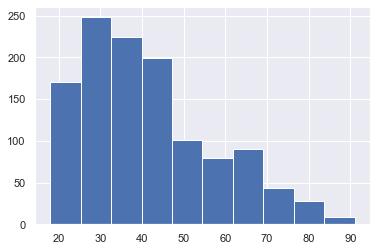

In [8]:
df['age'].hist()

In [9]:
# 66 is the full retirement age
over_retirement_age = df['age'] >= 66

array([[<AxesSubplot:title={'center':'earn'}>]], dtype=object)

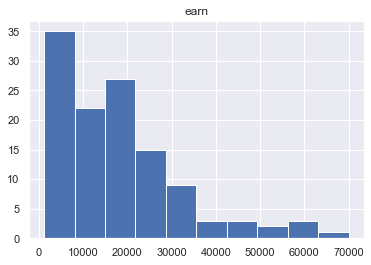

In [10]:
df[over_retirement_age][['earn']].hist()

array([[<AxesSubplot:title={'center':'earn'}>]], dtype=object)

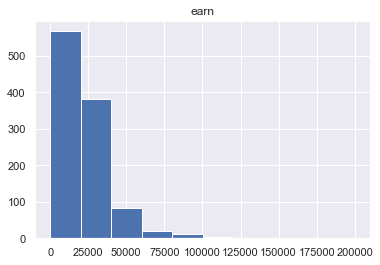

In [11]:
df[~over_retirement_age][['earn']].hist()

<AxesSubplot:xlabel='age'>

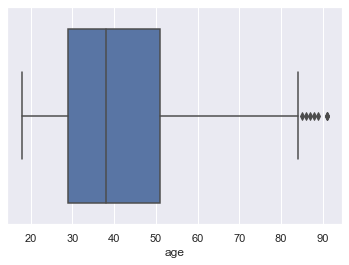

In [12]:
sns.boxplot(x=df['age'])

<AxesSubplot:xlabel='earn'>

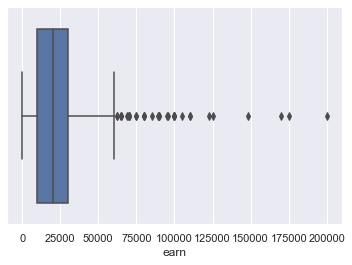

In [13]:
sns.boxplot(x=df['earn'])

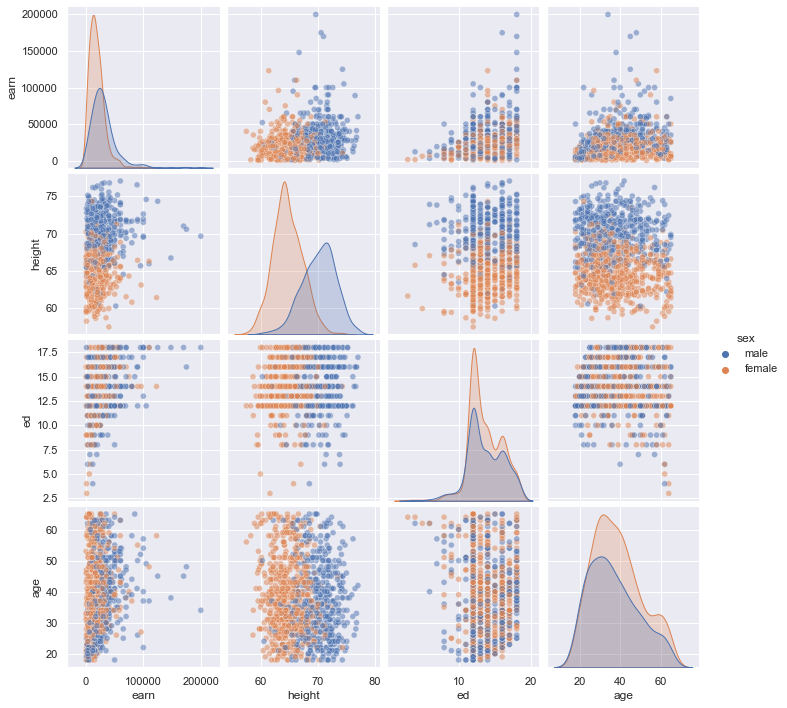

In [14]:
sns.pairplot(df[~over_retirement_age], hue='sex', diag_kind='kde', plot_kws=dict(alpha=0.5))

## Male vs. female

In [15]:
female_filter = df.sex == 'female'

In [16]:
salaries_female = df[female_filter]
salaries_male = df[~female_filter]

In [17]:
salaries_female.describe()

,earn,height,ed,age
count,687.000000,687.000000,687.000000,687.000000
mean,18280.195051,64.605603,13.436681,42.259098
std,14259.932378,2.612435,2.362547,15.931426
min,200.000000,57.503219,3.000000,18.000000
25%,9000.000000,62.873501,12.000000,30.000000
50%,15000.000000,64.372563,13.000000,39.000000
75%,25000.000000,66.276499,15.000000,51.000000
max,123000.000000,75.156660,18.000000,91.000000


In [18]:
salaries_male.describe()

,earn,height,ed,age
count,505.000000,505.000000,505.000000,505.000000
mean,29786.130693,70.057058,13.596040,40.180198
std,23297.816034,2.940739,2.495866,15.716524
min,1000.000000,60.298791,4.000000,18.000000
25%,16000.000000,68.107790,12.000000,28.000000
50%,25000.000000,70.277548,13.000000,37.000000
75%,36000.000000,72.085957,16.000000,50.000000
max,200000.000000,77.051282,18.000000,91.000000


Is it balanced?

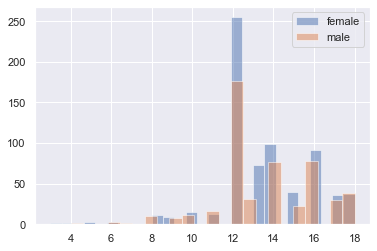

In [19]:
import matplotlib.pyplot as plt

plt.hist(salaries_female['ed'], bins='sqrt', alpha=0.5, label='female')
plt.hist(salaries_male['ed'], bins='sqrt',  alpha=0.5, label='male')
plt.legend()
plt.show()

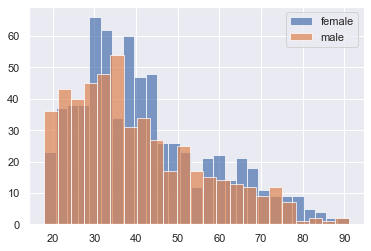

In [20]:
plt.hist(salaries_female['age'], bins='sqrt',  alpha=0.7, label='female')
plt.hist(salaries_male['age'], bins='sqrt', alpha=0.7,  label='male')
plt.legend()
plt.show()

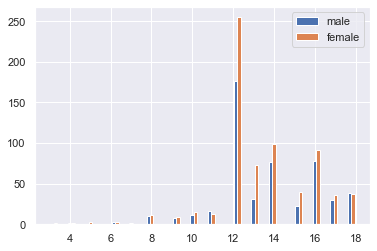

In [21]:
plt.hist([salaries_male['ed'], salaries_female['ed']], bins='sqrt', label=['male','female'])
plt.legend()
plt.show()

## Race

In [22]:
df.groupby(['sex', 'race']).size().unstack()

race,black,hispanic,other,white
sex,,,,
female,68,36,15,568
male,44,30,10,421
